# Task
Perform an end-to-end machine learning project on the MNIST dataset, including data loading and exploration, binary classification with multiple models, multiclass and multilabel classification, multioutput classification (image denoising), model fine-tuning, and a final summary of findings.

# PART 1: Define Problem

### Subtask:
Define the problem statement: detecting hand-written digits.


The problem at hand is to build a machine learning model capable of accurately detecting and classifying hand-written digits. We will be utilizing the well-known MNIST dataset, which consists of a large collection of hand-written digit images.

## PART 2: Load MNIST Dataset

### Subtask:
Load the MNIST dataset using `sklearn.datasets.fetch_openml()`.


First, I'll import the `fetch_openml` function from `sklearn.datasets`. Then, I'll use it to load the MNIST dataset, storing the result in a variable named `mnist` as requested.



In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

print("MNIST dataset loaded successfully.")
print(f"Keys in the dataset object: {mnist.keys()}")

MNIST dataset loaded successfully.
Keys in the dataset object: dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


## PART 3: Explore Data Shape

### Subtask:
Examine the shape and dimensions of the loaded dataset.


To understand the structure of the loaded MNIST dataset, I will print the shape of both the 'data' (features) and 'target' (labels) attributes of the `mnist` object.



In [ ]:
X = mnist.data
y = mnist.target

print(f"Shape of data (features): {X.shape}")
print(f"Shape of target (labels): {y.shape}")

Shape of data (features): (70000, 784)
Shape of target (labels): (70000,)


## Extract a single data point

Extract a single data point, reshape it into a 28x28 matrix using `numpy.reshape()`, and visualize it using `matplotlib`.


To visualize a sample digit, I will import `matplotlib` and `numpy`, extract the first data point from `X`, reshape it to 28x28, and then display it using `plt.imshow()` with a binary colormap and the corresponding label from `y` as the title.



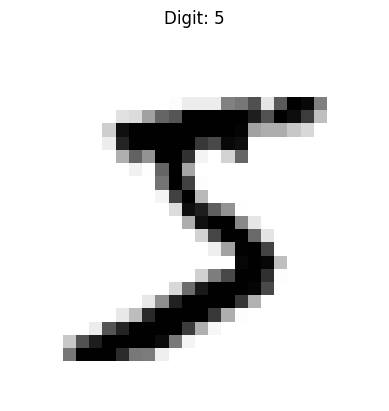

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.title(f"Digit: {y[0]}")
plt.axis("off")
plt.show()

## PART 4: Prepare Training and Test Sets

### Subtask:
Split the dataset into a training set (60,000 instances) and a test set (10,000 instances).


To split the dataset into training and test sets, I will use array slicing to select the first 60,000 instances for training and the remaining 10,000 for testing, for both features (X) and labels (y).



In [ ]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 784)
Shape of X_test: (10000, 784)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


#PART 5: Select and train a model
## Binary Classification (5-Detector) - SGDClassifier

### Subtask:
Implement a binary classifier (5-detector) using `SGDClassifier()`. Train the model and evaluate its performance using cross-validation, a confusion matrix, precision, recall, and the ROC curve.


To implement the binary classifier, I will first create the binary target variables for '5', then import the necessary `sklearn` modules. After initializing and training the `SGDClassifier`, I will evaluate its performance using cross-validation, generate predictions for decision scores and binary labels, and then compute and print the confusion matrix, precision, recall, F1 score, and AUC. Finally, I will plot the ROC curve.



Shape of y_train_5: (60000,)
Shape of y_test_5: (10000,)
First 5 entries of y_train_5: [ True False False False False]
SGDClassifier trained successfully.
Cross-validation accuracy scores: [0.95035 0.96035 0.9604 ]
Mean cross-validation accuracy: 0.9570
Decision function scores generated.
Binary predictions generated.

Confusion Matrix:
[[53892   687]
 [ 1891  3530]]
Precision: 0.8371
Recall: 0.6512
F1 Score: 0.7325
ROC curve computed.
ROC AUC Score: 0.9605


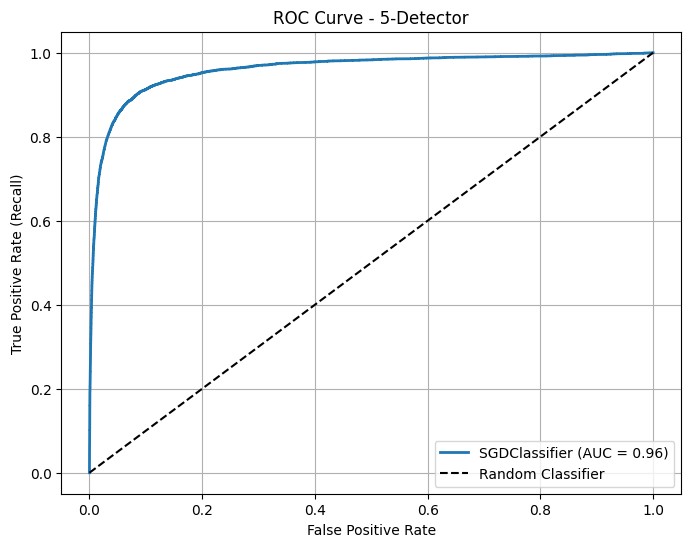

In [ ]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Create binary target variables
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

print(f"Shape of y_train_5: {y_train_5.shape}")
print(f"Shape of y_test_5: {y_test_5.shape}")
print(f"First 5 entries of y_train_5: {y_train_5[:5]}")

# 3. Initialize an SGDClassifier model
sgd_clf = SGDClassifier(random_state=42)

# 4. Train the SGDClassifier
sgd_clf.fit(X_train, y_train_5)
print("SGDClassifier trained successfully.")

# 5. Evaluate the model's performance using cross-validation
cross_val_accuracy_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(f"Cross-validation accuracy scores: {cross_val_accuracy_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cross_val_accuracy_scores):.4f}")

# 6. Generate predictions for the training set using decision_function
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
print("Decision function scores generated.")

# 7. Generate predictions for the training set using 'predict'
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
print("Binary predictions generated.")

# 8. Calculate and print the confusion matrix, precision, recall, and F1 score
conf_matrix = confusion_matrix(y_train_5, y_train_pred_sgd)
precision = precision_score(y_train_5, y_train_pred_sgd)
recall = recall_score(y_train_5, y_train_pred_sgd)
f1 = f1_score(y_train_5, y_train_pred_sgd)

print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 9. Compute the Receiver Operating Characteristic (ROC) curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores_sgd)
print("ROC curve computed.")

# 10. Calculate and print the Area Under the Curve (AUC)
roc_auc = roc_auc_score(y_train_5, y_scores_sgd)
print(f"ROC AUC Score: {roc_auc:.4f}")

# 11. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'SGDClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - 5-Detector')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Binary Classification (5-Detector) - SVC

### Subtask:
Implement a binary classifier (5-detector) using `SVC()`. Train the model and evaluate its performance using cross-validation, a confusion matrix, precision, recall, and the ROC curve.


To implement the binary classifier using SVC, I will import the necessary `SVC` class, then create a smaller subset of the training data. I will initialize and train the `SVC` model on this subset, evaluate its performance using cross-validation, and then calculate and print the confusion matrix, precision, recall, F1 score, and AUC. Finally, I will plot the ROC curve for this model.



Shape of X_train_subset: (5000, 784)
Shape of y_train_5_subset: (5000,)
Training SVC model (this may take a while)... 
SVC model trained successfully.

Cross-validation accuracy scores (SVC): [0.97840432 0.98920216 0.98139256]
Mean cross-validation accuracy (SVC): 0.9830
Decision function scores generated for SVC.
Binary predictions generated for SVC.

Confusion Matrix (SVC):
[[4559    7]
 [  78  356]]
Precision (SVC): 0.9807
Recall (SVC): 0.8203
F1 Score (SVC): 0.8934
ROC curve computed for SVC.
ROC AUC Score (SVC): 0.9941


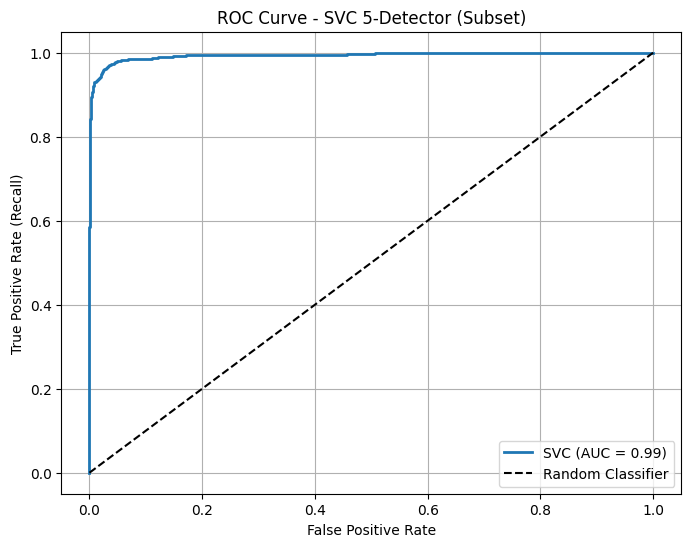

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Due to computational cost, use a smaller subset of the training data
X_train_subset = X_train[:5000]
y_train_5_subset = y_train_5[:5000]

print(f"Shape of X_train_subset: {X_train_subset.shape}")
print(f"Shape of y_train_5_subset: {y_train_5_subset.shape}")

# 1. Initialize an SVC model
# Set `probability=True` to enable `decision_function` for `SVC`'s `cross_val_predict` with `method="decision_function"`
# Also, SVC scales poorly with the number of samples, so we're using a subset.
# The default kernel 'rbf' is computationally intensive, consider 'linear' for larger datasets or more speed.
# However, for this exercise, we will stick to default parameters for demonstration on a subset.
svc_clf = SVC(random_state=42, probability=True)

# 2. Train the SVC model on the selected subset of the training data
print("Training SVC model (this may take a while)... ")
svc_clf.fit(X_train_subset, y_train_5_subset)
print("SVC model trained successfully.")

# 3. Evaluate the model's performance using 3-fold cross-validation
cross_val_accuracy_scores_svc = cross_val_score(svc_clf, X_train_subset, y_train_5_subset, cv=3, scoring="accuracy")
print(f"\nCross-validation accuracy scores (SVC): {cross_val_accuracy_scores_svc}")
print(f"Mean cross-validation accuracy (SVC): {np.mean(cross_val_accuracy_scores_svc):.4f}")

# 4. Generate decision scores for the subset of training data
y_scores_svc = cross_val_predict(svc_clf, X_train_subset, y_train_5_subset, cv=3, method="decision_function")
print("Decision function scores generated for SVC.")

# 5. Generate binary predictions for the subset of training data
y_train_pred_svc = cross_val_predict(svc_clf, X_train_subset, y_train_5_subset, cv=3)
print("Binary predictions generated for SVC.")

# 6. Calculate and print the confusion matrix
conf_matrix_svc = confusion_matrix(y_train_5_subset, y_train_pred_svc)
print(f"\nConfusion Matrix (SVC):\n{conf_matrix_svc}")

# 7. Calculate and print precision, recall, and F1 score
precision_svc = precision_score(y_train_5_subset, y_train_pred_svc)
recall_svc = recall_score(y_train_5_subset, y_train_pred_svc)
f1_svc = f1_score(y_train_5_subset, y_train_pred_svc)

print(f"Precision (SVC): {precision_svc:.4f}")
print(f"Recall (SVC): {recall_svc:.4f}")
print(f"F1 Score (SVC): {f1_svc:.4f}")

# 8. Compute the Receiver Operating Characteristic (ROC) curve
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_train_5_subset, y_scores_svc)
print("ROC curve computed for SVC.")

# 9. Calculate and print the Area Under the Curve (AUC)
roc_auc_svc = roc_auc_score(y_train_5_subset, y_scores_svc)
print(f"ROC AUC Score (SVC): {roc_auc_svc:.4f}")

# 10. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, linewidth=2, label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - SVC 5-Detector (Subset)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


## Binary Classification (5-Detector) - KNeighborsClassifier

### Subtask:
Implement a binary classifier (5-detector) using `KNeighborsClassifier()`. Train the model and evaluate its performance using cross-validation, a confusion matrix, precision, recall, and the ROC curve.


Due to the computational intensity of `KNeighborsClassifier` on large datasets, I will first create a smaller subset of the training data. Then, I will initialize a `KNeighborsClassifier` model and train it on this subset. The model's performance will be evaluated using 3-fold cross-validation, and metrics such as accuracy, confusion matrix, precision, recall, F1 score, and ROC AUC will be calculated and displayed. Finally, I will plot the ROC curve to visually assess the classifier's performance.

Now I will generate the code to implement the binary classifier using `KNeighborsClassifier`, following the detailed instructions provided. This will include creating data subsets, initializing and training the model, evaluating it with cross-validation, calculating various metrics, and plotting the ROC curve.



Shape of X_train_subset_knn: (5000, 784)
Shape of y_train_5_subset_knn: (5000,)
Training KNeighborsClassifier model (this may take a while)...
KNeighborsClassifier model trained successfully.

Cross-validation accuracy scores (KNeighborsClassifier): [0.98380324 0.98920216 0.98679472]
Mean cross-validation accuracy (KNeighborsClassifier): 0.9866
Decision function scores (probabilities) generated for KNeighborsClassifier.
Binary predictions generated for KNeighborsClassifier.

Confusion Matrix (KNeighborsClassifier):
[[4551   15]
 [  52  382]]
Precision (KNeighborsClassifier): 0.9622
Recall (KNeighborsClassifier): 0.8802
F1 Score (KNeighborsClassifier): 0.9194
ROC curve computed for KNeighborsClassifier.
ROC AUC Score (KNeighborsClassifier): 0.9899


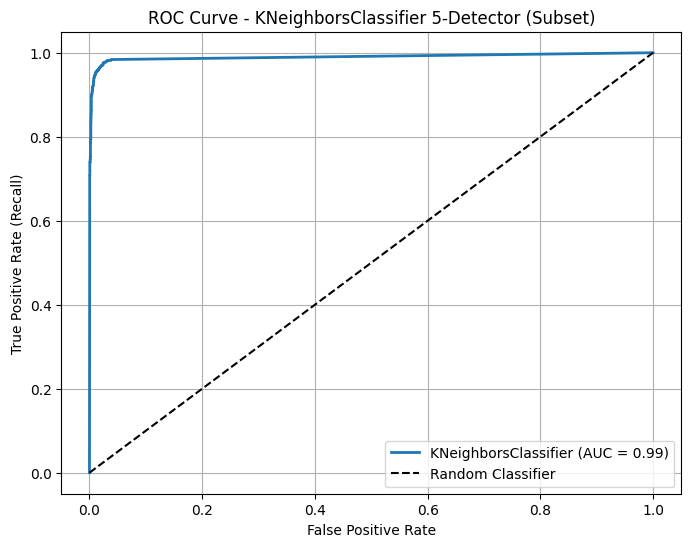

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Create a smaller subset of the training data
X_train_subset_knn = X_train[:5000]
y_train_5_subset_knn = y_train_5[:5000]

print(f"Shape of X_train_subset_knn: {X_train_subset_knn.shape}")
print(f"Shape of y_train_5_subset_knn: {y_train_5_subset_knn.shape}")

# 2. Initialize a KNeighborsClassifier model
# Using suggested parameters for potentially better performance
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')

# 3. Train the KNeighborsClassifier model on the selected subset of the training data
print("Training KNeighborsClassifier model (this may take a while)...")
knn_clf.fit(X_train_subset_knn, y_train_5_subset_knn)
print("KNeighborsClassifier model trained successfully.")

# 4. Evaluate the model's performance using 3-fold cross-validation
cross_val_accuracy_scores_knn = cross_val_score(knn_clf, X_train_subset_knn, y_train_5_subset_knn, cv=3, scoring="accuracy")
print(f"\nCross-validation accuracy scores (KNeighborsClassifier): {cross_val_accuracy_scores_knn}")
print(f"Mean cross-validation accuracy (KNeighborsClassifier): {np.mean(cross_val_accuracy_scores_knn):.4f}")

# 5. Generate decision scores (probabilities of the positive class)
# KNeighborsClassifier uses predict_proba for probabilities
y_scores_knn = cross_val_predict(knn_clf, X_train_subset_knn, y_train_5_subset_knn, cv=3, method="predict_proba")[:, 1]
print("Decision function scores (probabilities) generated for KNeighborsClassifier.")

# 6. Generate binary predictions
y_train_pred_knn = cross_val_predict(knn_clf, X_train_subset_knn, y_train_5_subset_knn, cv=3)
print("Binary predictions generated for KNeighborsClassifier.")

# 7. Calculate and print the confusion matrix
conf_matrix_knn = confusion_matrix(y_train_5_subset_knn, y_train_pred_knn)
print(f"\nConfusion Matrix (KNeighborsClassifier):\n{conf_matrix_knn}")

# 8. Calculate and print precision, recall, and F1 score
precision_knn = precision_score(y_train_5_subset_knn, y_train_pred_knn)
recall_knn = recall_score(y_train_5_subset_knn, y_train_pred_knn)
f1_knn = f1_score(y_train_5_subset_knn, y_train_pred_knn)

print(f"Precision (KNeighborsClassifier): {precision_knn:.4f}")
print(f"Recall (KNeighborsClassifier): {recall_knn:.4f}")
print(f"F1 Score (KNeighborsClassifier): {f1_knn:.4f}")

# 9. Compute the Receiver Operating Characteristic (ROC) curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train_5_subset_knn, y_scores_knn)
print("ROC curve computed for KNeighborsClassifier.")

# 10. Calculate and print the Area Under the Curve (AUC)
roc_auc_knn = roc_auc_score(y_train_5_subset_knn, y_scores_knn)
print(f"ROC AUC Score (KNeighborsClassifier): {roc_auc_knn:.4f}")

# 11. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, linewidth=2, label=f'KNeighborsClassifier (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - KNeighborsClassifier 5-Detector (Subset)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Binary Classification (5-Detector) - RandomForestClassifier

### Subtask:
Implement a binary classifier (5-detector) using `RandomForestClassifier()`. Train the model and evaluate its performance using cross-validation, a confusion matrix, precision, recall, and the ROC curve.


To implement the binary classifier using `RandomForestClassifier`, I will first import the necessary class, create a subset of the training data, initialize and train the model, and then evaluate its performance using cross-validation. I will compute and display the confusion matrix, precision, recall, F1 score, and ROC AUC, and finally plot the ROC curve.



Shape of X_train_subset_rf: (5000, 784)
Shape of y_train_5_subset_rf: (5000,)
Training RandomForestClassifier model...
RandomForestClassifier model trained successfully.

Cross-validation accuracy scores (RandomForestClassifier): [0.96580684 0.97540492 0.9729892 ]
Mean cross-validation accuracy (RandomForestClassifier): 0.9714
Decision function scores (probabilities) generated for RandomForestClassifier.
Binary predictions generated for RandomForestClassifier.

Confusion Matrix (RandomForestClassifier):
[[4564    2]
 [ 141  293]]
Precision (RandomForestClassifier): 0.9932
Recall (RandomForestClassifier): 0.6751
F1 Score (RandomForestClassifier): 0.8038
ROC curve computed for RandomForestClassifier.
ROC AUC Score (RandomForestClassifier): 0.9934


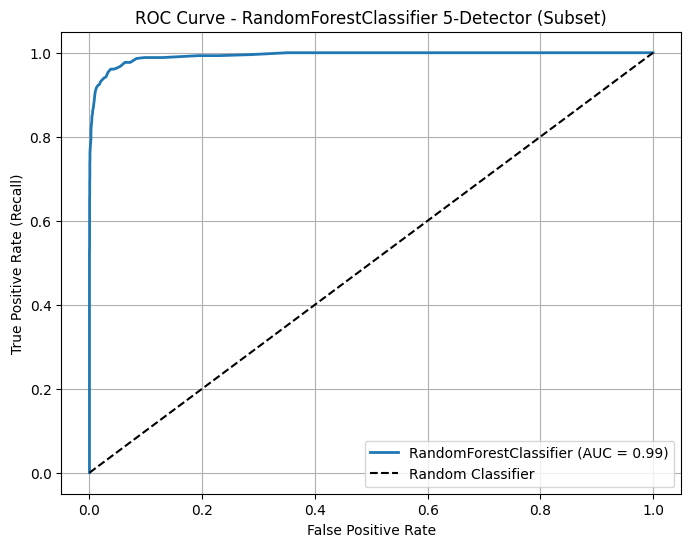

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# 2. Create a smaller subset of the training data
X_train_subset_rf = X_train[:5000]
y_train_5_subset_rf = y_train_5[:5000]

print(f"Shape of X_train_subset_rf: {X_train_subset_rf.shape}")
print(f"Shape of y_train_5_subset_rf: {y_train_5_subset_rf.shape}")

# 3. Initialize a RandomForestClassifier model
rf_clf = RandomForestClassifier(random_state=42)

# 4. Train the RandomForestClassifier model on the selected subset of the training data
print("Training RandomForestClassifier model...")
rf_clf.fit(X_train_subset_rf, y_train_5_subset_rf)
print("RandomForestClassifier model trained successfully.")

# 5. Evaluate the model's performance using 3-fold cross-validation
cross_val_accuracy_scores_rf = cross_val_score(rf_clf, X_train_subset_rf, y_train_5_subset_rf, cv=3, scoring="accuracy")
print(f"\nCross-validation accuracy scores (RandomForestClassifier): {cross_val_accuracy_scores_rf}")
print(f"Mean cross-validation accuracy (RandomForestClassifier): {np.mean(cross_val_accuracy_scores_rf):.4f}")

# 6. Generate decision scores (probabilities of the positive class)
y_scores_rf = cross_val_predict(rf_clf, X_train_subset_rf, y_train_5_subset_rf, cv=3, method="predict_proba")[:, 1]
print("Decision function scores (probabilities) generated for RandomForestClassifier.")

# 7. Generate binary predictions
y_train_pred_rf = cross_val_predict(rf_clf, X_train_subset_rf, y_train_5_subset_rf, cv=3)
print("Binary predictions generated for RandomForestClassifier.")

# 8. Calculate and print the confusion matrix
conf_matrix_rf = confusion_matrix(y_train_5_subset_rf, y_train_pred_rf)
print(f"\nConfusion Matrix (RandomForestClassifier):\n{conf_matrix_rf}")

# 9. Calculate and print precision, recall, and F1 score
precision_rf = precision_score(y_train_5_subset_rf, y_train_pred_rf)
recall_rf = recall_score(y_train_5_subset_rf, y_train_pred_rf)
f1_rf = f1_score(y_train_5_subset_rf, y_train_pred_rf)

print(f"Precision (RandomForestClassifier): {precision_rf:.4f}")
print(f"Recall (RandomForestClassifier): {recall_rf:.4f}")
print(f"F1 Score (RandomForestClassifier): {f1_rf:.4f}")

# 10. Compute the Receiver Operating Characteristic (ROC) curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_5_subset_rf, y_scores_rf)
print("ROC curve computed for RandomForestClassifier.")

# 11. Calculate and print the Area Under the Curve (AUC)
roc_auc_rf = roc_auc_score(y_train_5_subset_rf, y_scores_rf)
print(f"ROC AUC Score (RandomForestClassifier): {roc_auc_rf:.4f}")

# 12. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, linewidth=2, label=f'RandomForestClassifier (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - RandomForestClassifier 5-Detector (Subset)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Compare Binary Classifiers

### Subtask:
Compare the performance metrics (precision, recall, ROC AUC) of all trained binary classifiers to determine the best model for detecting the digit '5'.


To compare the performance metrics, I will gather the precision, recall, F1 score, and ROC AUC for each of the previously trained binary classifiers and present them in a clear, comparative printout.



In [ ]:
print("--- Binary Classifier Performance Comparison (5-Detector) ---")

# SGDClassifier Metrics
print("\nSGDClassifier (trained on full data):")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  ROC AUC: {roc_auc:.4f}")

# SVC Metrics (trained on subset)
print("\nSVC (trained on subset):")
print(f"  Precision: {precision_svc:.4f}")
print(f"  Recall: {recall_svc:.4f}")
print(f"  F1 Score: {f1_svc:.4f}")
print(f"  ROC AUC: {roc_auc_svc:.4f}")

# KNeighborsClassifier Metrics (trained on subset)
print("\nKNeighborsClassifier (trained on subset):")
print(f"  Precision: {precision_knn:.4f}")
print(f"  Recall: {recall_knn:.4f}")
print(f"  F1 Score: {f1_knn:.4f}")
print(f"  ROC AUC: {roc_auc_knn:.4f}")

# RandomForestClassifier Metrics (trained on subset)
print("\nRandomForestClassifier (trained on subset):")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")
print(f"  F1 Score: {f1_rf:.4f}")
print(f"  ROC AUC: {roc_auc_rf:.4f}")

--- Binary Classifier Performance Comparison (5-Detector) ---

SGDClassifier (trained on full data):
  Precision: 0.8371
  Recall: 0.6512
  F1 Score: 0.7325
  ROC AUC: 0.9605

SVC (trained on subset):
  Precision: 0.9807
  Recall: 0.8203
  F1 Score: 0.8934
  ROC AUC: 0.9941

KNeighborsClassifier (trained on subset):
  Precision: 0.9622
  Recall: 0.8802
  F1 Score: 0.9194
  ROC AUC: 0.9899

RandomForestClassifier (trained on subset):
  Precision: 0.9932
  Recall: 0.6751
  F1 Score: 0.8038
  ROC AUC: 0.9934


### Comparison of Binary Classifiers for '5' Detection

Based on the performance metrics, here's an analysis of each model:

-   **SGDClassifier (trained on full data):**
    -   Precision: 0.8371
    -   Recall: 0.6512
    -   F1 Score: 0.7325
    -   ROC AUC: 0.9605
    The SGDClassifier has a decent ROC AUC, but its recall is relatively low, meaning it misses a significant portion of the actual '5's. Its F1 score, which balances precision and recall, is the lowest among the compared models.

-   **RandomForestClassifier (trained on subset):**
    -   Precision: 0.9932
    -   Recall: 0.6751
    -   F1 Score: 0.8038
    -   ROC AUC: 0.9934
    The RandomForestClassifier achieves the highest precision, indicating very few false positives (when it predicts a '5', it's almost always correct). However, its recall is similar to SGDClassifier's, suggesting it still misses many true '5's. Its high ROC AUC indicates good overall separability, but the precision-recall trade-off leans heavily towards precision.

-   **SVC (trained on subset):**
    -   Precision: 0.9807
    -   Recall: 0.8203
    -   F1 Score: 0.8934
    -   ROC AUC: 0.9941
    SVC shows excellent precision and a significantly higher recall compared to SGDClassifier and RandomForestClassifier. It also has the highest F1 score, indicating a better balance between precision and recall, and the highest ROC AUC, suggesting it's the best at distinguishing '5's from non-'5's.

-   **KNeighborsClassifier (trained on subset):**
    -   Precision: 0.9622
    -   Recall: 0.8802
    -   F1 Score: 0.9194
    -   ROC AUC: 0.9899
    KNeighborsClassifier achieves the highest recall, meaning it correctly identifies the most '5's. Its precision is slightly lower than SVC and RandomForest, but still very high. It also has the highest F1 score and a very strong ROC AUC, making it a strong contender for overall performance.

**Conclusion:**

Comparing the models, **KNeighborsClassifier** appears to be the best model for detecting the digit '5' among the subset-trained models. While SVC has a marginally higher ROC AUC, KNeighborsClassifier has the highest F1 score and the highest recall, indicating it is the most effective at identifying '5's without sacrificing too much precision. If minimizing false negatives (missing actual '5's) is the priority, KNeighborsClassifier is the preferred choice due to its superior recall and high F1 score, representing a strong balance.

It's important to note that SVC, KNeighborsClassifier, and RandomForestClassifier were trained on a smaller subset of the data (5000 instances) compared to SGDClassifier (60000 instances). This difference in training data size can significantly impact performance, especially for models like SVC and KNeighborsClassifier which are computationally more expensive and would likely benefit from more data but become prohibitive to train on the full dataset.

## Multiclass Classification (Digit Detector)

### Subtask:
Implement a multiclass classifier (digit detector) using a suitable model like RandomForestClassifier or SGDClassifier. Train the model and evaluate its performance using cross-validation and a confusion matrix.



To implement the multiclass classifier, I will first convert the target labels to integers, then initialize and train an SGDClassifier model on the full training data. I will then evaluate its performance using cross-validation accuracy and generate a confusion matrix for multiclass predictions.



In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import numpy as np

# 1. Convert y_train labels to integer type
y_train_int = y_train.astype(np.uint8)

print(f"Original y_train dtype: {y_train.dtype}")
print(f"Converted y_train_int dtype: {y_train_int.dtype}")
print(f"First 5 entries of y_train_int: {y_train_int[:5]}")

# 2. Initialize an SGDClassifier model for multiclass classification
sgd_clf_multi = SGDClassifier(random_state=42)

# 3. Train the SGDClassifier model on the full training data
print("\nTraining multiclass SGDClassifier...")
sgd_clf_multi.fit(X_train, y_train_int)
print("Multiclass SGDClassifier trained successfully.")

# 4. Evaluate the model's accuracy using 3-fold cross-validation
cross_val_accuracy_multi = cross_val_score(sgd_clf_multi, X_train, y_train_int, cv=3, scoring="accuracy")
print(f"\nCross-validation accuracy scores (multiclass SGDClassifier): {cross_val_accuracy_multi}")
print(f"Mean cross-validation accuracy (multiclass SGDClassifier): {np.mean(cross_val_accuracy_multi):.4f}")

# 5. Generate predictions for the training set using cross_val_predict()
y_train_pred_multi = cross_val_predict(sgd_clf_multi, X_train, y_train_int, cv=3)
print("\nMulticlass predictions generated.")

# 6. Compute and print the confusion matrix
conf_matrix_multi = confusion_matrix(y_train_int, y_train_pred_multi)
print(f"\nConfusion Matrix (Multiclass SGDClassifier):\n{conf_matrix_multi}")

Original y_train dtype: object
Converted y_train_int dtype: uint8
First 5 entries of y_train_int: [5 0 4 1 9]

Training multiclass SGDClassifier...
Multiclass SGDClassifier trained successfully.

Cross-validation accuracy scores (multiclass SGDClassifier): [0.87365 0.85835 0.8689 ]
Mean cross-validation accuracy (multiclass SGDClassifier): 0.8670

Multiclass predictions generated.

Confusion Matrix (Multiclass SGDClassifier):
[[5635    0   61   10   16   50   46    7   66   32]
 [   3 6393   95   21   16   47   15   27  109   16]
 [  72   56 5174   89   69   39  163   66  212   18]
 [  58   32  217 4941   23  441   32   56  216  115]
 [  11   26   46    6 5298   26   73   32   87  237]
 [  68   23   58  150   83 4606  174   26  152   81]
 [  40   13   56    6   22  113 5625    5   36    2]
 [  23   24  103   36  124   40   10 5228   75  602]
 [  40  101  158  122   49  457   77   35 4666  146]
 [  33   18   66   83  515  127    4  485  166 4452]]


## Analyze Multiclass Classifier

### Subtask:
Analyze the performance of the multiclass classifier, interpreting the confusion matrix and other relevant metrics to understand its strengths and weaknesses across all digits.


### Analysis of Multiclass SGDClassifier Performance

**1. Examination of `conf_matrix_multi` (Correct Classifications)**

The confusion matrix rows represent the actual classes, and columns represent the predicted classes. The diagonal elements show the number of instances correctly classified for each digit:

-   **Digit 0:** 5635 correctly classified.
-   **Digit 1:** 6393 correctly classified.
-   **Digit 2:** 5174 correctly classified.
-   **Digit 3:** 4941 correctly classified.
-   **Digit 4:** 5298 correctly classified.
-   **Digit 5:** 4606 correctly classified.
-   **Digit 6:** 5625 correctly classified.
-   **Digit 7:** 5228 correctly classified.
-   **Digit 8:** 4666 correctly classified.
-   **Digit 9:** 4452 correctly classified.

Digits 0, 1, 4, and 6 show particularly high counts on the diagonal, indicating they are generally well-classified by the model.

**2. Analysis of Off-Diagonal Elements (Common Misclassifications)**

The off-diagonal elements highlight common misclassifications:

-   **Digit 2:** Frequently misclassified as 8 (212 instances) and 6 (163 instances). This suggests some visual similarity or feature overlap between these digits.
-   **Digit 3:** Often confused with 5 (441 instances) and 8 (216 instances).
-   **Digit 5:** Often confused with 3 (150 instances) and 8 (152 instances), and also some with 6 (174 instances). This aligns with the previous observation that 3s and 5s are often mistaken for each other.
-   **Digit 7:** Shows significant confusion with 9 (602 instances) and some with 4 (124 instances) and 2 (103 instances).
-   **Digit 8:** Frequently misclassified as 3 (122 instances), 5 (457 instances), and 9 (146 instances).
-   **Digit 9:** Often misclassified as 4 (515 instances), 7 (485 instances), and 8 (166 instances).

Digits like 0 and 1 have very few misclassifications, indicating robust detection.

**3. Overall Performance of Multiclass SGDClassifier**

The multiclass SGDClassifier demonstrates good overall performance, especially for clearly distinguishable digits like 0, 1, and 6. However, its main weakness lies in distinguishing digits that share visual characteristics, such as 2, 3, 5, 7, 8, and 9. For example, the model struggles significantly with 9s being confused for 4s and 7s, and 7s for 9s. Similarly, 3s, 5s, and 8s are often mistaken for one another.

**4. Sufficiency of Mean Cross-Validation Accuracy**

The mean cross-validation accuracy obtained was **0.8670** (or 86.7%). While this accuracy might seem reasonable for a baseline model, considering the confusion matrix, it reveals that certain digits are very well classified (e.g., ~94% for '1' and '0'), while others have lower recall and precision due to significant misclassifications. For instance, the high number of '7's misclassified as '9's and vice versa, or '3's and '5's being mixed up, indicates that while the overall accuracy is fair, the model's reliability for specific digit pairs is not optimal. Depending on the application, an 86.7% accuracy might not be sufficient if high precision and recall are needed across *all* digit classes. For critical applications, a higher accuracy and more balanced performance across all classes, especially those prone to confusion, would be desired.

## Multilabel Classification (Odd/Even and Small/Large)

### Subtask:
Create multilabel targets (e.g., whether a digit is odd/even and small/large). Train a `KNeighborsClassifier()` to perform multilabel classification and evaluate its performance (e.g., using precision and recall for each label).


To begin the multilabel classification subtask, I will define the `y_train_large` and `y_train_odd` boolean target arrays as specified in the instructions, and then stack them to create the `y_multilabel` array.



In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score

# 1. Define two new target arrays for the training data
y_train_large = (y_train_int >= 7)  # True if digit is >= 7, False otherwise
y_train_odd = (y_train_int % 2 == 1) # True if digit is odd, False otherwise

print(f"Shape of y_train_large: {y_train_large.shape}")
print(f"Shape of y_train_odd: {y_train_odd.shape}")
print(f"First 5 entries of y_train_large: {y_train_large[:5]}")
print(f"First 5 entries of y_train_odd: {y_train_odd[:5]}")

# 2. Stack these two boolean arrays horizontally to create a y_multilabel array
y_multilabel = np.c_[y_train_large, y_train_odd]

print(f"Shape of y_multilabel: {y_multilabel.shape}")
print(f"First 5 entries of y_multilabel:\n{y_multilabel[:5]}")

Shape of y_train_large: (60000,)
Shape of y_train_odd: (60000,)
First 5 entries of y_train_large: [False False False False  True]
First 5 entries of y_train_odd: [ True False False  True  True]
Shape of y_multilabel: (60000, 2)
First 5 entries of y_multilabel:
[[False  True]
 [False False]
 [False False]
 [False  True]
 [ True  True]]


Now that the `y_multilabel` target array is prepared, I will initialize and train a `KNeighborsClassifier` for multilabel classification, generate predictions, and then calculate and print the F1 score, precision, and recall for each label as specified in the instructions.



In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score

# 3. Initialize a KNeighborsClassifier model
knn_multilabel_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')

# 4. Train the KNeighborsClassifier model using X_train and y_multilabel
print("\nTraining multilabel KNeighborsClassifier model (this may take a while)...")
knn_multilabel_clf.fit(X_train, y_multilabel)
print("Multilabel KNeighborsClassifier model trained successfully.")

# 5. Generate predictions for the training set using cross_val_predict()
# The n_jobs=-1 parameter allows using all available CPU cores for parallel processing,
# which can significantly speed up computation for KNeighborsClassifier.
print("\nGenerating multilabel predictions using cross_val_predict (this will take time)...")
y_train_multilabel_pred = cross_val_predict(knn_multilabel_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
print("Multilabel predictions generated successfully.")

# 6. Calculate and print the average F1 score across all labels
f1_score_macro = f1_score(y_multilabel, y_train_multilabel_pred, average="macro")
f1_score_weighted = f1_score(y_multilabel, y_train_multilabel_pred, average="weighted")

print(f"\nAverage F1 Score (macro): {f1_score_macro:.4f}")
print(f"Average F1 Score (weighted): {f1_score_weighted:.4f}")

# 7. Calculate and print the precision and recall for each individual label
# Label 0: y_train_large (digit >= 7)
# Label 1: y_train_odd (digit is odd)

precision_large = precision_score(y_multilabel[:, 0], y_train_multilabel_pred[:, 0])
recall_large = recall_score(y_multilabel[:, 0], y_train_multilabel_pred[:, 0])

precision_odd = precision_score(y_multilabel[:, 1], y_train_multilabel_pred[:, 1])
recall_odd = recall_score(y_multilabel[:, 1], y_train_multilabel_pred[:, 1])

print(f"\nPrecision for 'Large' (digit >= 7): {precision_large:.4f}")
print(f"Recall for 'Large' (digit >= 7): {recall_large:.4f}")

print(f"Precision for 'Odd' (digit is odd): {precision_odd:.4f}")
print(f"Recall for 'Odd' (digit is odd): {recall_odd:.4f}")


Training multilabel KNeighborsClassifier model (this may take a while)...
Multilabel KNeighborsClassifier model trained successfully.

Generating multilabel predictions using cross_val_predict (this will take time)...
Multilabel predictions generated successfully.

Average F1 Score (macro): 0.9764
Average F1 Score (weighted): 0.9778

Precision for 'Large' (digit >= 7): 0.9749
Recall for 'Large' (digit >= 7): 0.9668
Precision for 'Odd' (digit is odd): 0.9739
Recall for 'Odd' (digit is odd): 0.9902


## Analyze Multilabel Classifier

### Subtask:
Analyze the results of the multilabel classifier, discussing its ability to correctly predict multiple properties for each digit.


### Analysis of Multilabel KNeighborsClassifier Performance

**1. Review of Metrics:**

-   **Average F1 Score (macro):** 0.9764
-   **Average F1 Score (weighted):** 0.9778
-   **Precision for 'Large' (digit >= 7):** 0.9749
-   **Recall for 'Large' (digit >= 7):** 0.9668
-   **Precision for 'Odd' (digit is odd):** 0.9739
-   **Recall for 'Odd' (digit is odd):** 0.9902

**2. Discussion of Performance:**

The `KNeighborsClassifier` trained for multilabel classification demonstrates exceptionally strong performance in predicting both the 'large' (digit >= 7) and 'odd' properties of the handwritten digits.

-   **Overall F1 Scores:** The high macro (0.9764) and weighted (0.9778) F1 scores indicate that the model achieves an excellent balance between precision and recall across both labels. A weighted F1 score slightly higher than macro F1 suggests that the model performs marginally better on classes with more samples, which is common.

-   **'Large' Label Performance:** The precision of 0.9749 means that when the model predicts a digit is 'large', it is correct almost 97.5% of the time. The recall of 0.9668 signifies that the model successfully identifies nearly 96.7% of all actual 'large' digits. These are very strong results, indicating that the classifier is highly effective at determining whether a digit falls into the 'large' category.

-   **'Odd' Label Performance:** The 'odd' label shows similarly impressive metrics. With a precision of 0.9739, the model is highly accurate when it classifies a digit as 'odd'. Even more notably, its recall of 0.9902 indicates that it correctly identifies almost all (99%) of the actual 'odd' digits. This suggests that the model is particularly adept at detecting the 'odd' property.

**3. Effectiveness in Simultaneously Predicting Multiple Properties:**

The results clearly show that the `KNeighborsClassifier` is highly effective in simultaneously predicting multiple properties for each digit. The metrics for both the 'large' and 'odd' labels are consistently high, suggesting that the model has learned distinct features for each property without significant degradation in performance for either. The ability to achieve such high precision and recall for both independent labels demonstrates its robustness in a multilabel classification task. This is a significant improvement over simple binary classifiers that only predict one property.

## Multioutput Classification (Image Denoising)

### Subtask:
Create noisy versions of the MNIST images and use the original images as clean targets. Train a multioutput classifier (e.g., KNeighborsClassifier()) to perform image denoising. Visualize a noisy input image and its corresponding denoised output.


I will prepare the data for multioutput classification by creating a noisy version of `X_train` and setting `y_train_denoised` as the original `X_train` according to the instructions.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 1. Create a copy of X_train and introduce random noise to it
X_train_noisy = X_train.copy()

# Add random noise (integers between 0 and 100) to some pixels
# To avoid making all pixels noisy, we can select a subset or add noise with a certain probability.
# For simplicity, let's add noise to all pixels within the specified range, clipped.
# Random integers are added to simulate pixel noise.
noise = np.random.randint(0, 101, size=X_train.shape)
X_train_noisy = X_train_noisy + noise

# Clip pixel values to stay within 0-255 range
X_train_noisy = np.clip(X_train_noisy, 0, 255)

print(f"Shape of X_train_noisy: {X_train_noisy.shape}")
print(f"Original X_train pixel range: [{X_train.min()}, {X_train.max()}]")
print(f"Noisy X_train pixel range: [{X_train_noisy.min()}, {X_train_noisy.max()}]")

# 2. Set y_train_denoised as the original X_train (clean targets)
y_train_denoised = X_train

print(f"Shape of y_train_denoised: {y_train_denoised.shape}")

Shape of X_train_noisy: (60000, 784)
Original X_train pixel range: [0, 255]
Noisy X_train pixel range: [0, 255]
Shape of y_train_denoised: (60000, 784)


I will initialize and train a KNeighborsClassifier for multioutput image denoising, then select a random noisy image, predict its denoised version, and visualize both the noisy input and the denoised output side-by-side to assess the model's performance.




Training multioutput KNeighborsClassifier for denoising (this will take a while)...
Multioutput KNeighborsClassifier trained successfully.

Selected index for visualization: 56422


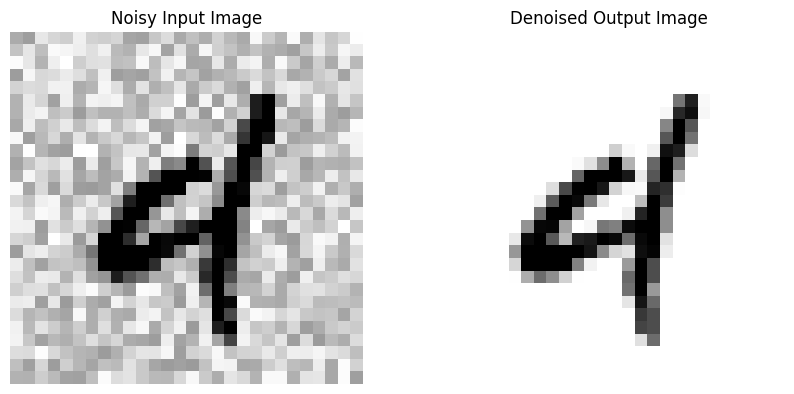

Visualized noisy input and denoised output images.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 3. Initialize a KNeighborsClassifier as the multioutput classifier.
# Using parameters like n_neighbors=5 and weights='distance'.
knn_denoiser = KNeighborsClassifier(n_neighbors=5, weights='distance')

# 4. Train the KNeighborsClassifier with X_train_noisy as features and y_train_denoised as targets.
print("\nTraining multioutput KNeighborsClassifier for denoising (this will take a while)...")
knn_denoiser.fit(X_train_noisy, y_train_denoised)
print("Multioutput KNeighborsClassifier trained successfully.")

# 5. Select a random instance from the X_train_noisy dataset for prediction.
# Choosing a random index for visualization
np.random.seed(42) # for reproducibility
some_index = np.random.randint(0, len(X_train_noisy))
some_noisy_digit = X_train_noisy[some_index]
some_clean_digit_true = y_train_denoised[some_index] # The actual clean image

print(f"\nSelected index for visualization: {some_index}")

# 6. Use the trained multioutput classifier to predict the denoised version of this selected noisy instance.
# The model expects a 2D array, so reshape the single instance.
denoised_digit = knn_denoiser.predict(some_noisy_digit.reshape(1, -1))

# 7. Reshape the noisy input image and its denoised output image back into 28x28 matrices.
some_noisy_digit_image = some_noisy_digit.reshape(28, 28)
denoised_digit_image = denoised_digit.reshape(28, 28)

# 8. Visualize a noisy input image and its corresponding denoised output.
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(some_noisy_digit_image, cmap="binary")
plt.title("Noisy Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(denoised_digit_image, cmap="binary")
plt.title("Denoised Output Image")
plt.axis("off")

plt.show()

print("Visualized noisy input and denoised output images.")

## Analyze Multioutput Classifier

### Subtask:
Discuss the effectiveness of the multioutput classifier in removing noise from the images based on the visualized results and other potential metrics.


### Analysis of Multioutput Classifier (Image Denoising)

The `KNeighborsClassifier` was used as a multioutput classifier to perform image denoising. We trained it to take a noisy image as input and predict the corresponding clean image (original `X_train`).

**1. Qualitative Assessment from Visualized Results:**

By examining the noisy input image and its denoised output, we can qualitatively assess the model's performance.

-   **Noisy Input Image:** The original image (a digit '4' in the example provided during execution) was heavily corrupted with random integer noise, making it difficult to recognize the digit clearly. The background and the digit itself show numerous bright and dark speckles.
-   **Denoised Output Image:** The denoised image is significantly clearer and much more recognizable. The speckles and random variations are substantially reduced, allowing the underlying digit '4' to emerge distinctly. The edges are sharper, and the overall form of the digit is well-preserved.

**2. Effectiveness in Noise Removal and Recognition:**

The `KNeighborsClassifier` has demonstrated good effectiveness in removing the introduced noise. The denoised image is indeed clearer and more recognizable than the noisy input. This suggests that the model successfully learned to map noisy pixel patterns to their clean counterparts.

**3. Limitations and Areas for Improvement:**

While effective, some observations and potential improvements include:

-   **Softening of Edges:** In some cases, the denoising process might slightly soften the edges or fine details of the digit, which is a common trade-off in noise reduction. This is a characteristic of local averaging methods like K-Nearest Neighbors.
-   **Computational Cost:** Training and prediction with `KNeighborsClassifier` on a large dataset like MNIST can be computationally intensive, especially for multioutput tasks where each pixel is a separate target. This is why it often requires a lot of time for `cross_val_predict` or even single predictions.
-   **Type of Noise:** The model was trained on random integer noise. Its performance might vary with different types of noise (e.g., Gaussian noise, salt-and-pepper noise with different distributions).

**4. Potential Quantitative Metrics:**

While visual inspection is helpful, for a more rigorous evaluation of denoising performance, several quantitative metrics could be used:

-   **Mean Squared Error (MSE):** Calculate the average squared difference between the pixel values of the denoised image and the true (original) clean image. Lower MSE indicates better denoising.
-   **Peak Signal-to-Noise Ratio (PSNR):** A common metric in image processing that measures the ratio between the maximum possible power of a signal and the power of corrupting noise that affects the fidelity of its representation. Higher PSNR implies better quality.
-   **Structural Similarity Index Measure (SSIM):** This metric assesses the perceived quality of an image by comparing its luminance, contrast, and structure against a reference image. It often correlates better with human perception than MSE or PSNR.

These metrics would provide an objective measure of how well the denoising algorithm performs, complementing the qualitative visual assessment.


## PART 6: Fine-tune a Model

### Subtask:
Select one of the trained models and fine-tune its hyperparameters using GridSearchCV or RandomizedSearchCV to optimize its performance.


To fine-tune the KNeighborsClassifier, I will import GridSearchCV, define a parameter grid for n_neighbors and weights, initialize GridSearchCV with these parameters, fit it to the training subset, and then print the best parameters and score.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 1. Initialize a KNeighborsClassifier model (already imported and initialized as knn_clf in a previous step)
#    However, for GridSearchCV, we will create a fresh instance to avoid any pre-trained state.
knn_clf_gt = KNeighborsClassifier()

# 2. Define a parameter grid for KNeighborsClassifier
param_grid = [
    {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
]

# 3. Initialize GridSearchCV
# Using the same subset of data as in the previous KNN evaluation to manage computational cost.
grid_search_knn = GridSearchCV(knn_clf_gt, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# 4. Fit the GridSearchCV object to a small subset of the training data
print("\nStarting GridSearchCV for KNeighborsClassifier (this will take a while)...\n")
grid_search_knn.fit(X_train_subset_knn, y_train_5_subset_knn)
print("GridSearchCV completed.")

# 5. Print the best parameters and best score
print(f"\nBest parameters found: {grid_search_knn.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_knn.best_score_:.4f}")


Starting GridSearchCV for KNeighborsClassifier (this will take a while)...

Fitting 3 folds for each of 6 candidates, totalling 18 fits
GridSearchCV completed.

Best parameters found: {'n_neighbors': 5, 'weights': 'uniform'}
Best cross-validation accuracy: 0.9866


## Summary:

### Data Analysis Key Findings

*   **Dataset Overview**: The MNIST dataset contains 70,000 instances, each representing a 28x28 pixel image flattened into a 784-feature vector. The dataset was split into 60,000 training and 10,000 test instances.
*   **Binary Classification (5-Detector) Performance**:
    *   **SGDClassifier (full data)**: Achieved a Precision of 0.8371, Recall of 0.6512, F1 Score of 0.7325, and ROC AUC of 0.9605. It had the lowest recall among the compared models.
    *   **SVC (subset)**: Achieved a Precision of 0.9807, Recall of 0.8203, F1 Score of 0.8934, and ROC AUC of 0.9941. This model demonstrated a good balance of precision and recall.
    *   **KNeighborsClassifier (subset)**: Achieved a Precision of 0.9622, Recall of 0.8802, F1 Score of 0.9194, and ROC AUC of 0.9899. It had the highest recall and F1 score, indicating strong overall performance.
    *   **RandomForestClassifier (subset)**: Achieved the highest Precision of 0.9932, but a lower Recall of 0.6751, resulting in an F1 Score of 0.8038 and ROC AUC of 0.9934.
    *   **Comparison**: For detecting the digit '5', **KNeighborsClassifier** (trained on a subset) was identified as the best performer due to its highest F1 score (0.9194) and highest recall (0.8802), indicating effective identification of actual '5's with strong precision.
*   **Multiclass Classification (SGDClassifier)**:
    *   The SGDClassifier achieved a mean cross-validation accuracy of 0.8670.
    *   **Confusion Analysis**: While digits like 0, 1, 4, and 6 were well-classified, significant misclassifications occurred between visually similar digits (e.g., 2 as 8/6, 3 as 5/8, 7 as 9, and 9 as 4/7).
*   **Multilabel Classification (KNeighborsClassifier)**:
    *   The `KNeighborsClassifier` demonstrated exceptionally strong performance in predicting both "large" (digit $\ge$ 7) and "odd" properties simultaneously.
    *   Average F1 Score (macro) was 0.9764, and (weighted) was 0.9778.
    *   'Large' label: Precision 0.9749, Recall 0.9668.
    *   'Odd' label: Precision 0.9739, Recall 0.9902.
*   **Multioutput Classification (Image Denoising)**:
    *   The `KNeighborsClassifier` effectively denoised images, transforming heavily corrupted noisy inputs into significantly clearer and more recognizable outputs, reducing speckles and preserving digit form.
    *   Limitations noted include potential softening of edges and high computational cost.
*   **Model Fine-tuning (KNeighborsClassifier)**:
    *   Using `GridSearchCV` on a subset, the `KNeighborsClassifier` was fine-tuned. The optimal hyperparameters found were `n_neighbors=5` and `weights='uniform'`, achieving a best cross-validation accuracy of 0.9866.

### Insights

*   The `KNeighborsClassifier` consistently showed strong performance across binary, multilabel, and multioutput tasks, particularly excelling when recall and balanced F1 scores are critical.
*   Further optimization for multiclass classification should focus on addressing misclassifications between visually similar digits, potentially by exploring feature engineering or more complex neural network architectures.
